In [1]:
import torch
from torch import nn
from torchviz import make_dot, make_dot_from_trace

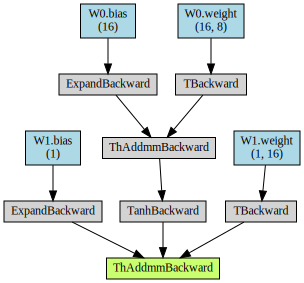

In [2]:
model = nn.Sequential()
model.add_module('W0', nn.Linear(8, 16))
model.add_module('tanh', nn.Tanh())
model.add_module('W1', nn.Linear(16, 1))

x = torch.randn(1,8)

make_dot(model(x), params=dict(model.named_parameters()))

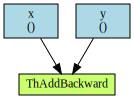

In [3]:
x = torch.tensor(5., requires_grad=True)
y = torch.tensor(2., requires_grad=True)

z = x + y

make_dot(z, params={'x': x, 'y': y})

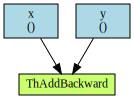

In [4]:
make_dot(z, params={'x': x, 'y': y})

In [5]:
from ptvi import *
from ptvi.models.filtered_sv_model import *


In [6]:
torch.manual_seed(123)
T = 10
model = FilteredStochasticVolatilityModel(input_length=T, num_particles=1, resample=False)
params = dict(a=1., b=0., c=.95)
y, z_true = model.simulate(**params)
ζ = torch.zeros(model.d, requires_grad=True)
lj = model.ln_joint(y, ζ)

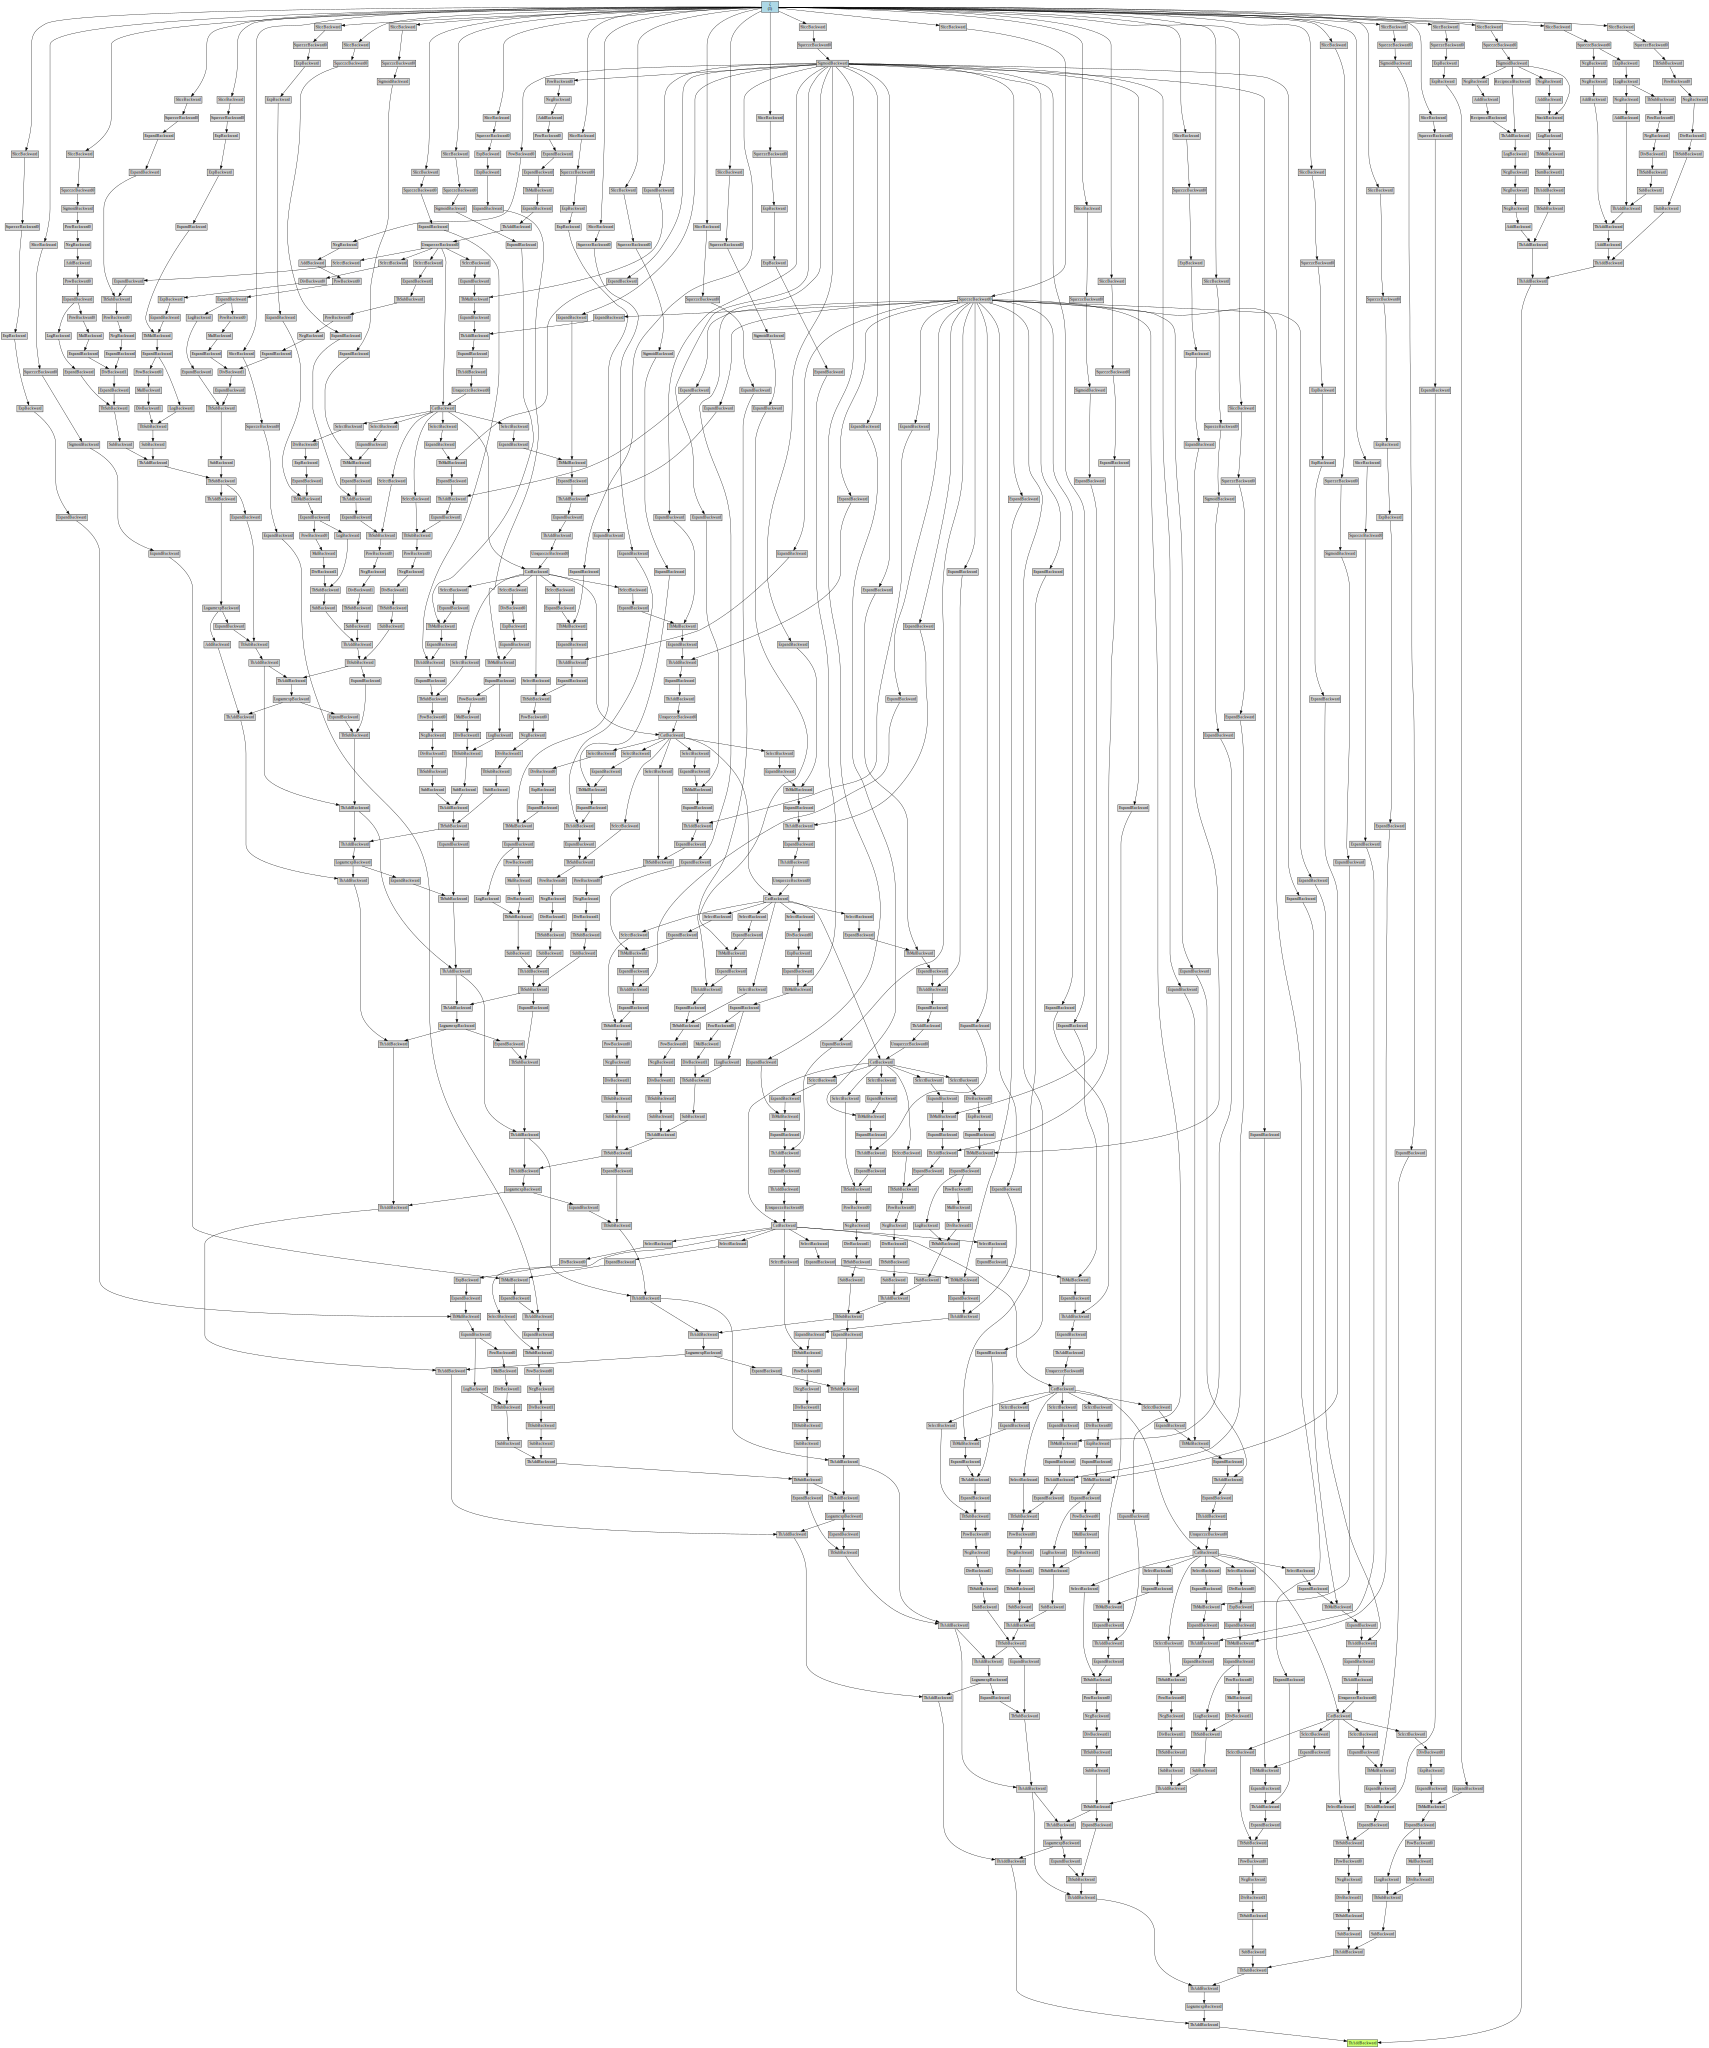

In [7]:
make_dot(lj, params={'ζ': ζ})

In [8]:
data_seed, algo_seed = 123, 123
params = dict(a=1., b=0., c=.95)
T = 2
model = FilteredSVModelDualOpt(input_length=T, num_particles=500, resample=True)
torch.manual_seed(data_seed)
y, z_true = model.simulate(**params)
torch.manual_seed(algo_seed)
ζ = torch.tensor([1., 0., .95], requires_grad=True)
η = torch.tensor([0., .95], requires_grad=True)
lj = model.ln_joint(y, ζ, η)

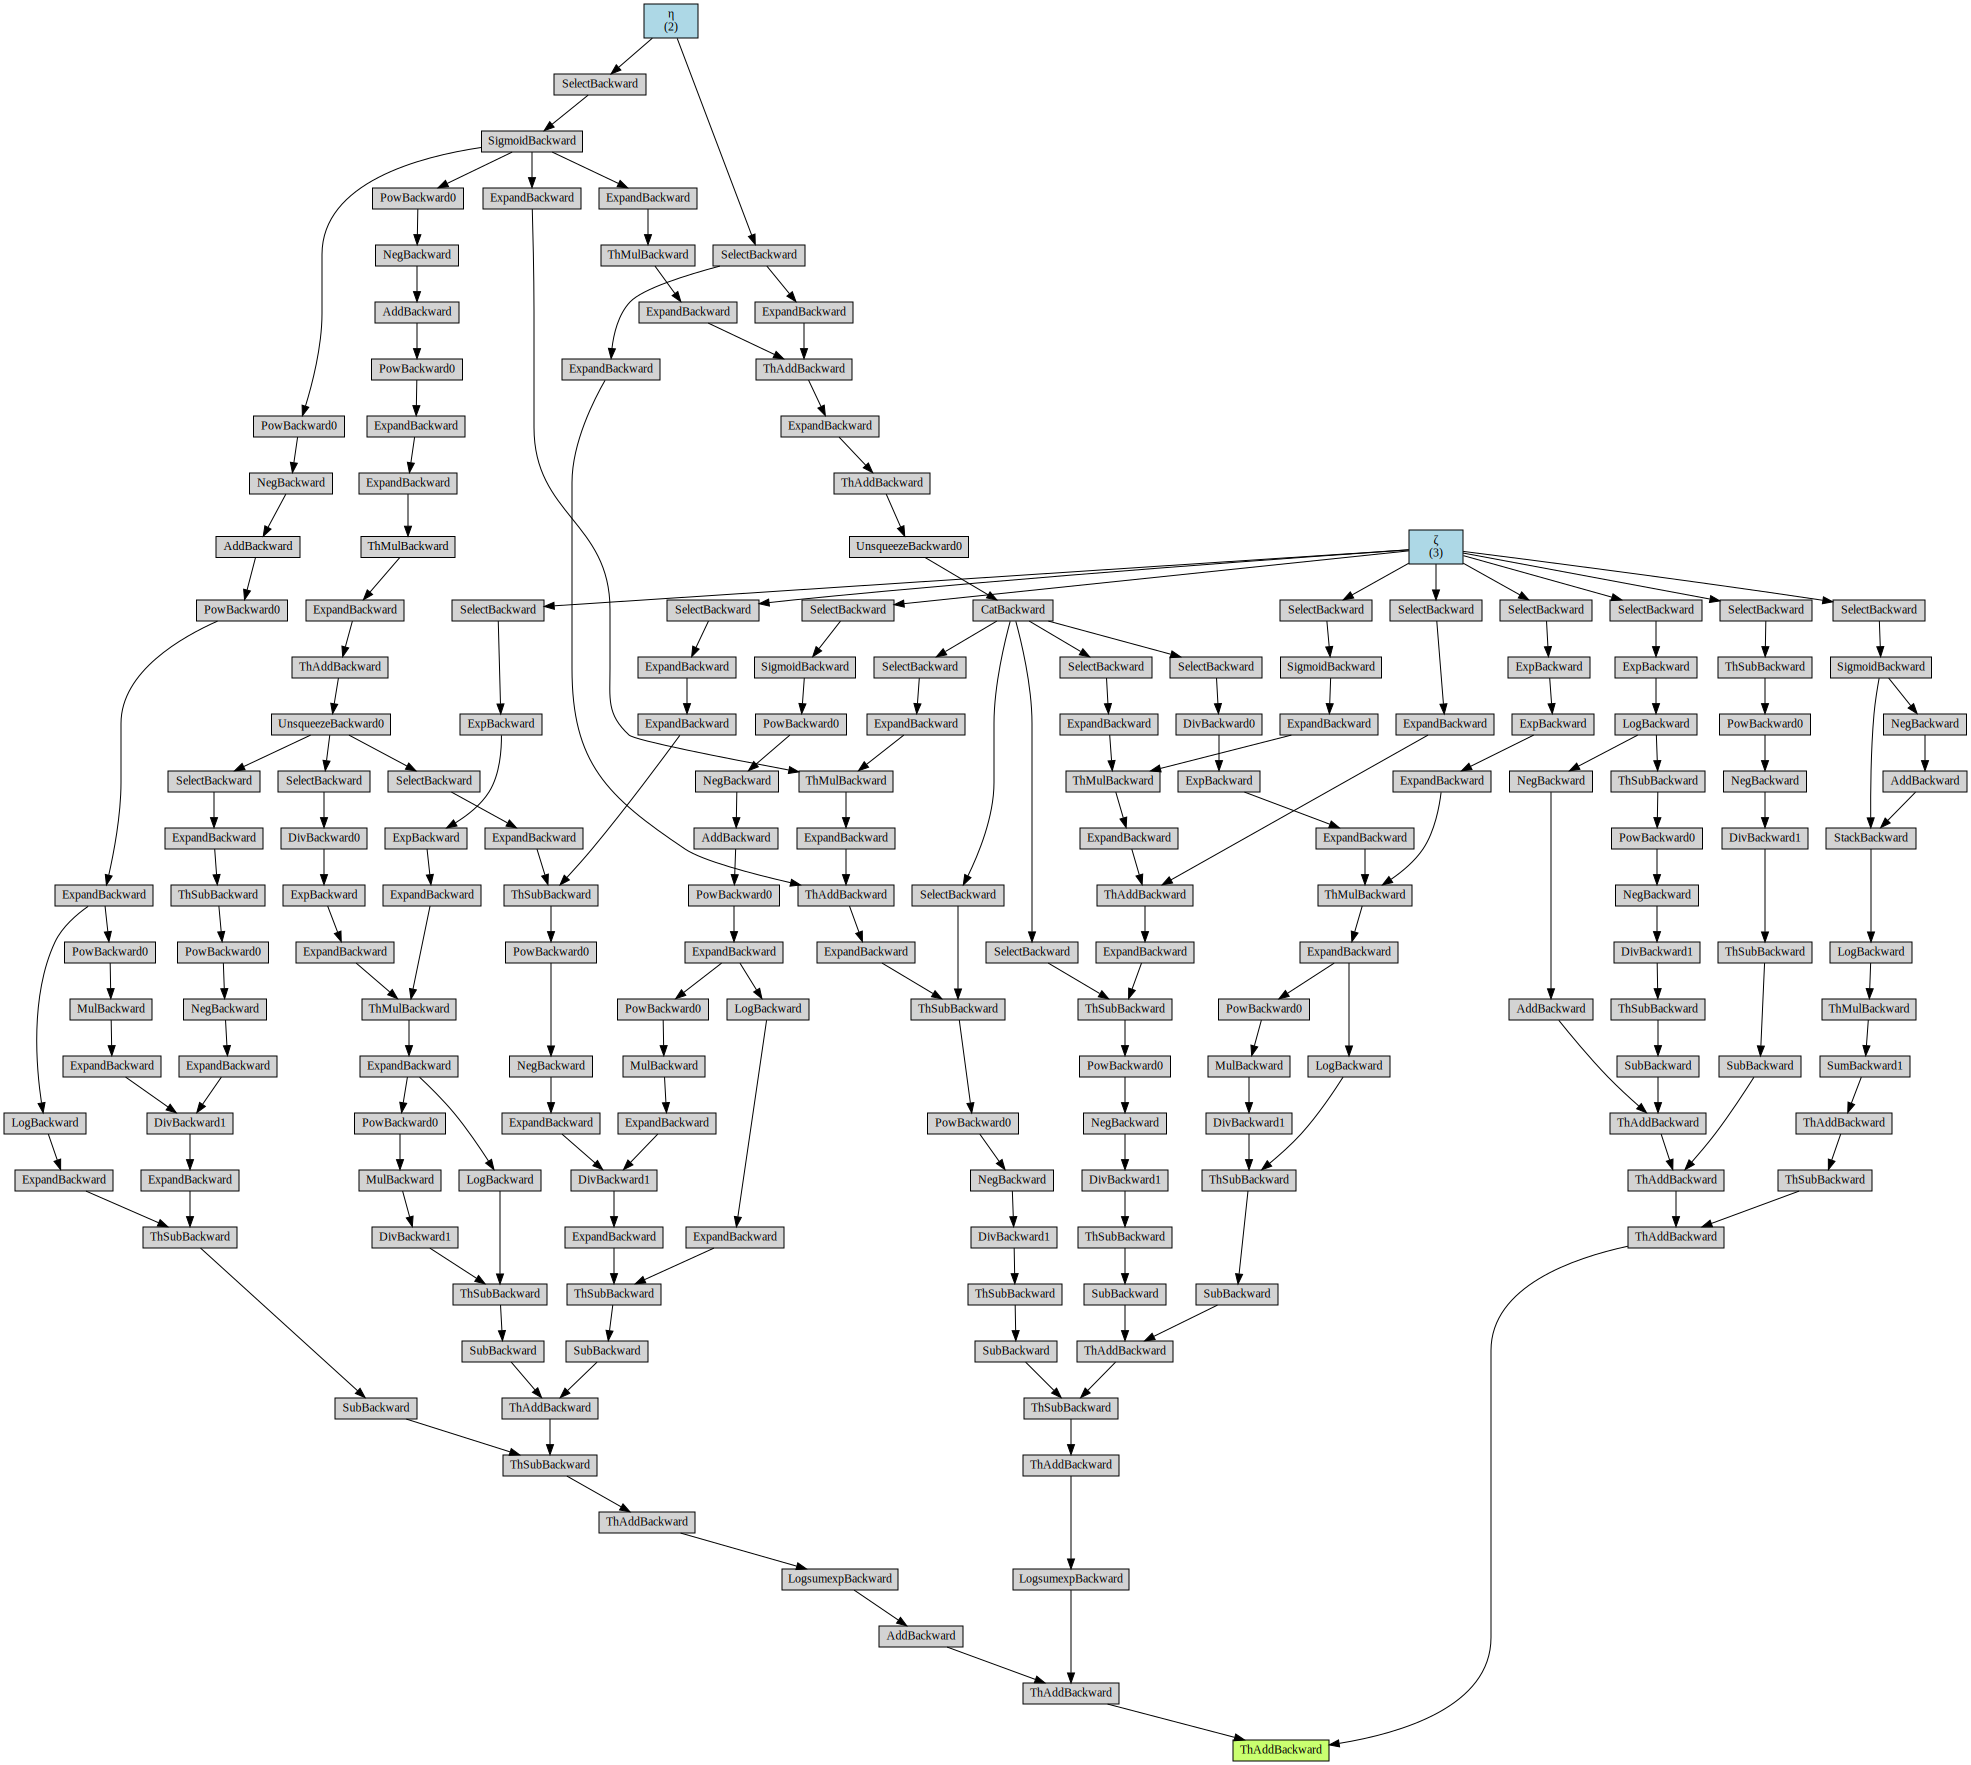

In [9]:
make_dot(lj, params=dict(ζ=ζ, η=η))